# Pokerman Data Analysis

In [1]:
# Load in the data
Pokerman=read.csv(file="E:/Xu/Cornell/STSCI4740_SL/Project/Pokemon.csv",head=TRUE,na.strings=c(""))
# Get the general information of the dataframe
str(Pokerman)
attach(Pokerman)

'data.frame':	800 obs. of  13 variables:
 $ X.        : int  1 2 3 3 4 5 6 6 6 7 ...
 $ Name      : Factor w/ 800 levels "Abomasnow","AbomasnowMega Abomasnow",..: 81 330 746 747 103 104 100 101 102 666 ...
 $ Type.1    : Factor w/ 18 levels "Bug","Dark","Dragon",..: 10 10 10 10 7 7 7 7 7 18 ...
 $ Type.2    : Factor w/ 18 levels "Bug","Dark","Dragon",..: 14 14 14 14 NA NA 8 3 8 NA ...
 $ Total     : int  318 405 525 625 309 405 534 634 634 314 ...
 $ HP        : int  45 60 80 80 39 58 78 78 78 44 ...
 $ Attack    : int  49 62 82 100 52 64 84 130 104 48 ...
 $ Defense   : int  49 63 83 123 43 58 78 111 78 65 ...
 $ Sp..Atk   : int  65 80 100 122 60 80 109 130 159 50 ...
 $ Sp..Def   : int  65 80 100 120 50 65 85 85 115 64 ...
 $ Speed     : int  45 60 80 80 65 80 100 100 100 43 ...
 $ Generation: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Legendary : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


X.       Name     Type.1     Type.2      Total         HP     Attack 
         0          0          1        386          0          0          0 
   Defense    Sp..Atk    Sp..Def      Speed Generation  Legendary 
         0          0          0          0          0          0

X.       Name     Type.1     Type.2      Total         HP     Attack 
       721        800         19         19        200         94        111 
   Defense    Sp..Atk    Sp..Def      Speed Generation  Legendary 
       103        105         92        108          6          2

Warning message:
"package 'Amelia' was built under R version 3.4.2"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


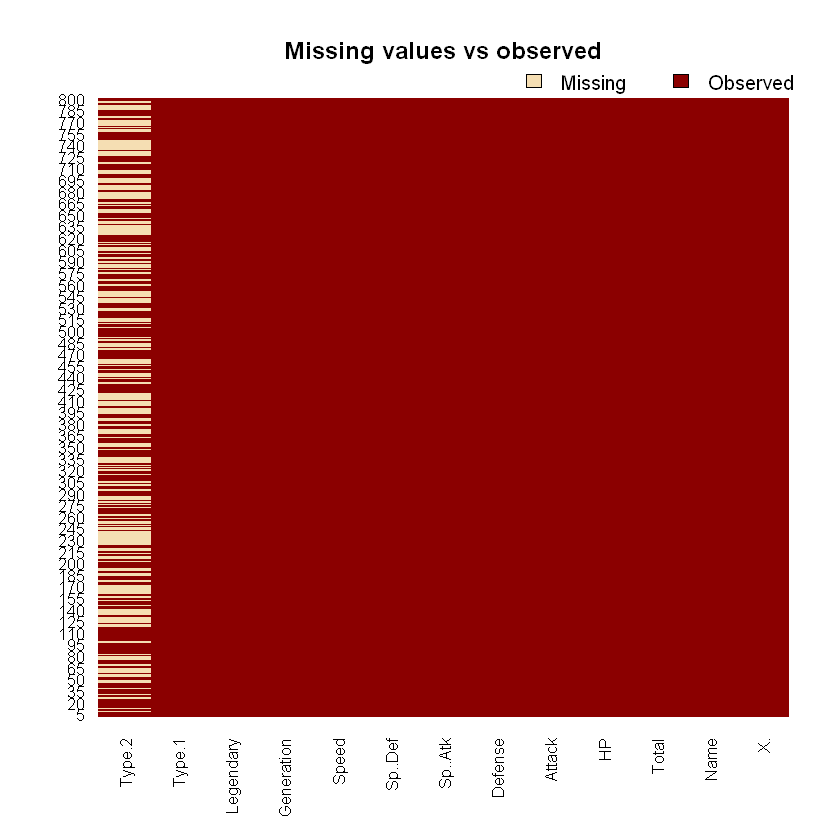

In [2]:
# Missing Value Check
# Check for the missing values and  look how many unique values there are for each variable using the sapply()
sapply(Pokerman,function(x) sum(is.na(x)))
# Summarize the unique values 
sapply(Pokerman, function(x) length(unique(x)))
# Make a visual take on the missing values
library(Amelia)
missmap(Pokerman, main = "Missing values vs observed")
# Deal with the missing value
Pokerman$Type.1[is.na(Pokerman$Type.1)]="Poison"

In [3]:
# Build a simple logstic regression model to classify the property of legerndary
# Split the data into training and testing 
train=Pokerman[1:640,]
test=Pokerman[641:800,]
# Fit a logistic regression model on the Legendary Variable to answer the question 2 
logmodel <- glm(Legendary~HP+Attack+Defense+Sp..Atk+Sp..Def+Speed+Generation,family=binomial(link='logit'),data=train)
summary(logmodel)
# Interpret the results of logistic regression model
# First of all the Attack variable is not statistically significant
# All the coefficients are positive,which means the higher the attributes, the more likely a poker man is going to be a legendary
anova(logmodel,test="Chisq")


Call:
glm(formula = Legendary ~ HP + Attack + Defense + Sp..Atk + Sp..Def + 
    Speed + Generation, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04295  -0.12190  -0.02940  -0.00458   2.34271  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -23.512428   3.112061  -7.555 4.18e-14 ***
HP            0.035868   0.009968   3.598  0.00032 ***
Attack        0.008551   0.008059   1.061  0.28865    
Defense       0.033869   0.010988   3.082  0.00205 ** 
Sp..Atk       0.033504   0.008585   3.903 9.51e-05 ***
Sp..Def       0.047308   0.011524   4.105 4.04e-05 ***
Speed         0.057315   0.011923   4.807 1.53e-06 ***
Generation    0.416873   0.204519   2.038  0.04152 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 315.27  on 639  degrees of freedom
Residual deviance: 119.28  on 632  

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,639,315.2670,NA
HP,1,29.011004,638,286.2560,7.196833e-08
Attack,1,34.857592,637,251.3984,3.547237e-09
Defense,1,12.819253,636,238.5792,3.430707e-04
Sp..Atk,1,62.021389,635,176.5578,3.397470e-15
Sp..Def,1,21.731185,634,154.8266,3.136509e-06
Speed,1,31.123425,633,123.7032,2.421316e-08
Generation,1,4.418883,632,119.2843,3.554330e-02


Warning message in FUN(X[[i]], ...):
"there is no package called 'ggExtra'"

ggplot2 gridExtra   ggExtra     dplyr 
     TRUE      TRUE     FALSE      TRUE

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

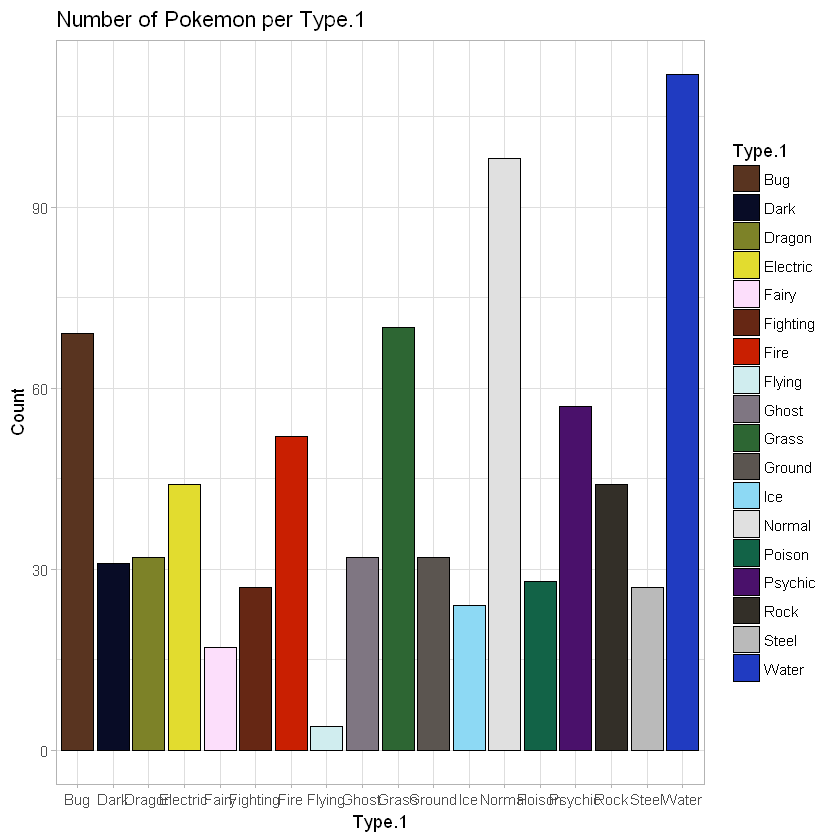

In [4]:
sapply(c("ggplot2","gridExtra","ggExtra","dplyr"), library, character.only = T, logical.return = T, quietly = T, warn.conflicts = F)
colors <- c("#593420","#080c26","#7d8228", "#e2dc2f","#fcdefb","#662714","#c91f01","#d0edef","#7f7682","#2d6633","#5b5550","#8dd9f4","#e0e0e0","#126347","#4a116b","#332f28","#bababa","#203bc1")

## Check the distribution of Type.1 Pokerman
ggplot(Pokerman,aes(x=Type.1,fill=Type.1))+
  geom_histogram(stat="count",color="black")+
  scale_fill_manual(values=as.character(colors))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(title="Number of Pokemon per Type.1",x="Type.1",y="Count")+theme_light()

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

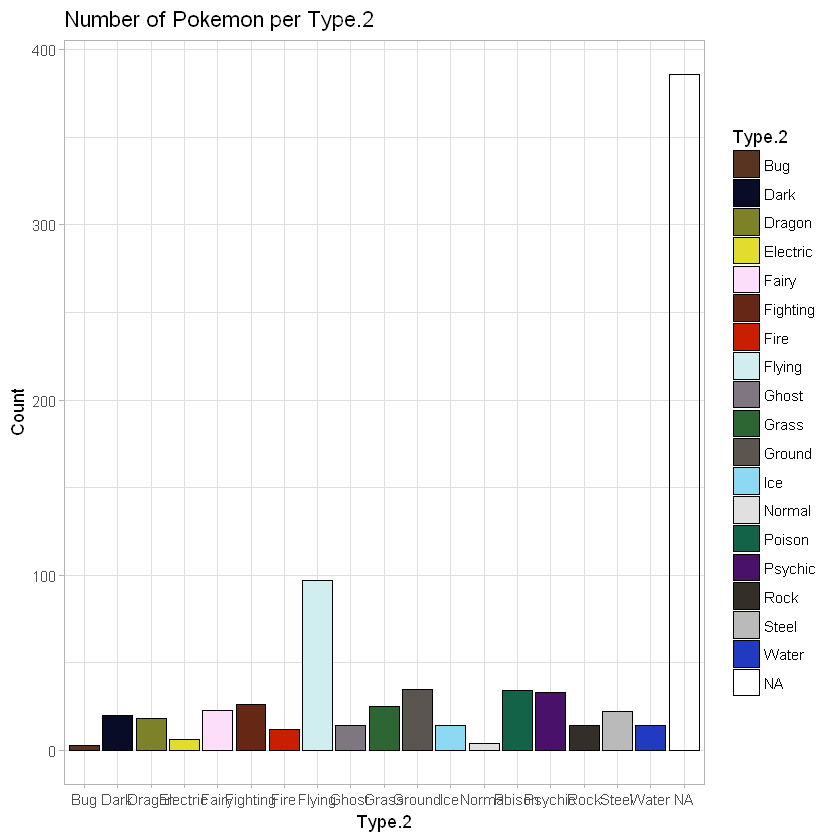

In [5]:
# check the distribution of Type.2 Pokerman
ggplot(Pokerman,aes(x=Type.2,fill=Type.2))+
  geom_histogram(stat="count",color="black")+
  scale_fill_manual(values=as.character(colors))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(title="Number of Pokemon per Type.2",x="Type.2",y="Count")+theme_light()

In [6]:
### Try establishing a KNN method to classify for Type.1
library(class)
knn.1 <-  knn(train[,c(6,7,8,9,10,11)], test[,c(6,7,8,9,10,11)], train$Type.1, k=1)

In [7]:
library(caret)
# A crucial step to make caret library work
Pokerman$Legendary <- factor(Pokerman$Legendary, labels = c("yes", "no"))
# Set a fitcontrol model
fitControl <- trainControl(method = "cv",number = 2)
# Train different classification models to tack problem 2
# Try Gradient Boosting Model
gbmFit1 <- train(Legendary~HP+Attack+Defense+Sp..Atk+Sp..Def+Speed,data=Pokerman,method = "gbm", trControl = fitControl,verbose = FALSE)
# Try Random Forest Model
RF1=train(Legendary~HP+Attack+Defense+Sp..Atk+Sp..Def+Speed,data=Pokerman,method = "rf", trControl = fitControl,verbose = FALSE)
# Try SVM model
svmlinear1=train(Legendary~HP+Attack+Defense+Sp..Atk+Sp..Def+Speed,data=Pokerman,method = "svmLinear", trControl = fitControl,verbose = FALSE)

Warning message:
"package 'caret' was built under R version 3.4.2"Loading required package: lattice
Warning message:
"package 'gbm' was built under R version 3.4.2"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Warning message:
"package 'randomForest' was built under R version 3.4.2"randomForest 4.6-12
Type rfNews() to